### Work in Progress: Last Updated 07/20/2023

# The Legend of Yoshida : An Analysis of Masataka Yoshida's First 27 Games in Boston
 Mastaka Yoshida was signed by the Boston Red Sox this past off-season on a 5 year 90 million dollar contract from Japan. Considered an overpay by many, Yoshida began putting his name on the world map by playing for Team Japan in this year's World Baseball Classic, finishing the tournament as a champion and arguably their best player. This created quite a bit of excitement for Red Sox nation and after a slow 13 game start, Yoshida caught fire and went on a 14 game hitting streak. This analysis serves to take a look at how Yoshida improved over those 14 games and what changes he may have made to make those improvements.

In [1]:
# Importing packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading CSV, data sourced from Baseball Reference
df = pd.read_csv("/Users/matt-eisenhauer/Desktop/Local/Sports Data/Yoshida/yoshida_23")

In [3]:
# Get size of dataframe (32 rows x 40 columns)
df.shape

(32, 40)

In [4]:
# See all columns of dataframe and view first 5 rows
pd.set_option('display.max_columns', None)
df.head()

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1.0,1.0,1,03/30/23,BOS,NaN,BAL,L9-10,CG,5,4,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.500,0.600,0.500,1.100,4.0,1.49,0.034,1.46,0.02%,2.56,12,15.7,LF
1,2.0,2.0,2,04/01/23,BOS,NaN,BAL,W9-8,GS-9,5,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.222,0.300,0.222,0.522,4.0,1.55,-0.129,1.42,-0.07%,-1.35,0,0.0,LF
2,3.0,3.0,3,04/02/23,BOS,NaN,BAL,W9-5,CG,5,4,3,2,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0.308,0.400,0.308,0.708,4.0,0.97,0.146,0.94,0.09%,1.71,23,31.6,DH
3,4.0,4.0,4,04/03/23,BOS,NaN,PIT,L6-7,CG,5,4,1,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0.294,0.400,0.471,0.871,4.0,1.99,0.062,1.82,0.03%,1.00,18,25.2,LF
4,5.0,5.0,5,04/04/23,BOS,NaN,PIT,L1-4,CG,4,4,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0.238,0.333,0.381,0.714,4.0,1.18,0.087,1.00,0.04%,0.62,2,3.5,LF


In [5]:
# View datatypes for each column
df.dtypes

Rk            float64
Gcar          float64
Gtm            object
Date           object
Tm             object
Unnamed: 5     object
Opp            object
Rslt           object
Inngs          object
PA              int64
AB              int64
R               int64
H               int64
2B              int64
3B              int64
HR              int64
RBI             int64
BB              int64
IBB             int64
SO              int64
HBP             int64
SH              int64
SF              int64
ROE             int64
GDP             int64
SB              int64
CS              int64
BA            float64
OBP           float64
SLG           float64
OPS           float64
BOP           float64
aLI           float64
WPA           float64
acLI          float64
cWPA           object
RE24          float64
DFS(DK)         int64
DFS(FD)       float64
Pos            object
dtype: object

We can begin cleaning up our data. We have no use for the 'Unnamed' column as it is only representing the '@' symbol for opponent. We'll get rid of that below.

In [6]:
df.columns[5]
df.drop(df.columns[5], axis=1, inplace=True)
df.head()

,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1.0,1.0,1,03/30/23,BOS,BAL,L9-10,CG,5,4,1,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.500,0.600,0.500,1.100,4.0,1.49,0.034,1.46,0.02%,2.56,12,15.7,LF
1,2.0,2.0,2,04/01/23,BOS,BAL,W9-8,GS-9,5,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.222,0.300,0.222,0.522,4.0,1.55,-0.129,1.42,-0.07%,-1.35,0,0.0,LF
2,3.0,3.0,3,04/02/23,BOS,BAL,W9-5,CG,5,4,3,2,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0.308,0.400,0.308,0.708,4.0,0.97,0.146,0.94,0.09%,1.71,23,31.6,DH
3,4.0,4.0,4,04/03/23,BOS,PIT,L6-7,CG,5,4,1,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0.294,0.400,0.471,0.871,4.0,1.99,0.062,1.82,0.03%,1.00,18,25.2,LF
4,5.0,5.0,5,04/04/23,BOS,PIT,L1-4,CG,4,4,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0.238,0.333,0.381,0.714,4.0,1.18,0.087,1.00,0.04%,0.62,2,3.5,LF


We'll need to correct datatypes for specific columns we want to plot as well. The below code will change column datatype to numeric.

In [7]:
#Originally encountered an error in plotting so need to convert datatypes to numeric
#Converting both Gcar and Gtm to numeric, however will use Gcar in plotting. 
df['Gcar'] = pd.to_numeric(df['Gcar'], errors='coerce')
df['Gtm'] = pd.to_numeric(df['Gtm'], errors='coerce')
df['BA'] = pd.to_numeric(df['BA'], errors='coerce')
df['OPS'] = pd.to_numeric(df['OPS'], errors='coerce')

In [8]:
# Checking to see where Yoshida's Hit Streak started (Game 13 through 28)
df.loc[:, ['Gcar', 'H']]

,Gcar,H
0,1.0,2
1,2.0,0
2,3.0,2
3,4.0,1
4,5.0,0
5,6.0,0
6,7.0,2
7,8.0,0
8,9.0,1
9,10.0,0


We can create a quick plot to show Yoshida's Batting Average and OPS before, during, and after the 14 game hitstreak. Dotted lines represent where the hitstreak started and ended. 

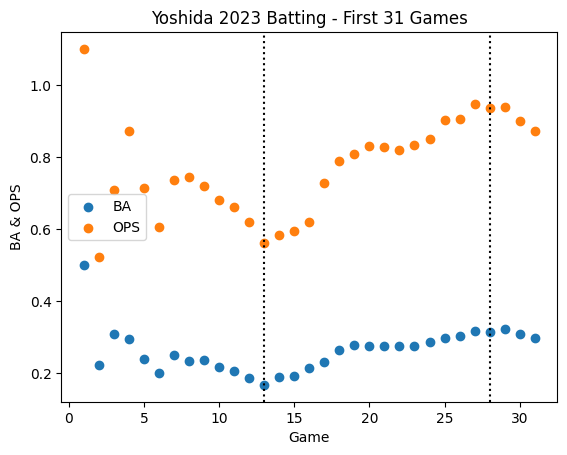

In [9]:
# Defining Scatter Objects
# Plotting Gcar instead of Gtm as Gcar are games that Yoshida appeared in, Gtm is overall games
plt.scatter(df['Gcar'], df['BA'], label='BA')
plt.scatter(df['Gcar'], df['OPS'], label='OPS')
# Adding Title, labeling axes, creating legend
plt.title('Yoshida 2023 Batting - First 31 Games')
plt.xlabel('Game')
plt.ylabel('BA & OPS')
plt.legend()
# Adding dotted line at y=13 to signify where hitstreak began
start_line = plt.axvline(x=13, linestyle='dotted', color='black')
end_line = plt.axvline(x=28, linestyle='dotted', color='black')
# Display plot
plt.show()

We'll also take a quick look at how his numbers improved over those 14 games. To do this, we'll create two new dataframes, for 12 games to start the season and the following 14 game hitting streak.

In [10]:
# Creating two separate dataframes to compare before hitstreak and during hitstreak
yoshi_first_12 = df.iloc[:13].copy()
yoshi_next_14 = df.iloc[13:29].copy()
yoshi_next_14.columns

Index(['Rk', 'Gcar', 'Gtm', 'Date', 'Tm', 'Opp', 'Rslt', 'Inngs', 'PA', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF',
       'ROE', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS', 'BOP', 'aLI',
       'WPA', 'acLI', 'cWPA', 'RE24', 'DFS(DK)', 'DFS(FD)', 'Pos'],
      dtype='object')

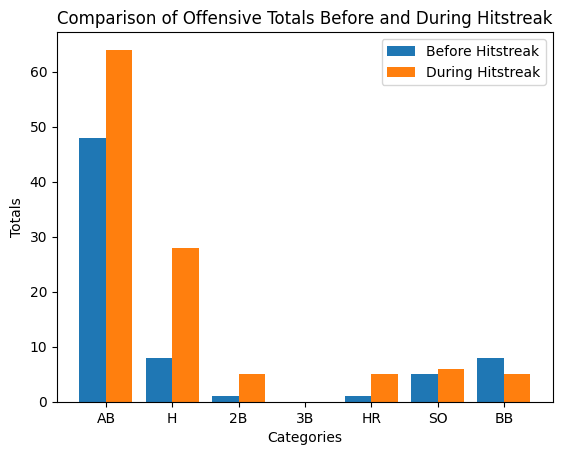

In [11]:
# Setting paramaters to create double bar graph to compare offensive totals for before and during the hitstreak
totals_df1 = yoshi_first_12[['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']].sum()
totals_df2 = yoshi_next_14[['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']].sum()

labels = ['AB', 'H', '2B', '3B', 'HR', 'SO', 'BB']
x = range(len(labels))

plt.bar(x, totals_df1, width=0.4, label='Before Hitstreak')
plt.bar([i + 0.4 for i in x], totals_df2, width=0.4, label='During Hitstreak')

plt.xlabel('Categories')
plt.ylabel('Totals')
plt.title('Comparison of Offensive Totals Before and During Hitstreak')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

plt.show()

Now that we have a look at totals, we want to better understand what Yoshida may have changed in his approach to start that streak. Our first step is to gather data on every pitch Yoshida has seen this year. My initial approach was to scrape this data from Baseball Savant (and I may still do so at a later date, extra practice), but I found a python package called pybaseball which can do this for me. So, to make this exercise a bit easier, we'll install and begin to play around with the package.

In [81]:
#!pip install pybaseball 

In [12]:
from pybaseball import statcast
from pybaseball import  playerid_lookup
from pybaseball import  statcast_batter

In [13]:
# Get Yoshida Player ID
playerid_lookup('yoshida', 'masataka')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,yoshida,masataka,807799,yoshm002,yoshima02,31837,2023.0,2023.0


In [14]:
# Gathering Yoshida PBP stats based on specified date range
yoshi_id = 807799
yoshi_stats = statcast_batter('2023-03-30', '2023-05-07', yoshi_id)

Gathering Player Data


In [15]:
yoshi_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [16]:
yoshi_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2023-05-07,93.9,-1.98,6.70,"Yoshida, Masataka",807799,592836,field_out,hit_into_play,NaN,NaN,NaN,NaN,2,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,X,6.0,fly_ball,2,1,2023,-0.76,1.36,0.21,3.29,NaN,NaN,NaN,1,4,Top,110.22,125.47,NaN,NaN,592663,NaN,NaN,7.271707,-136.454965,-5.991793,-11.155418,31.599119,-14.097215,3.23,1.43,192.0,75.8,55.0,92.6,2173.0,5.7,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.80,0.100,0.116,0.0,1.0,0.0,0.0,3.0,21,4,4-Seam Fastball,0,0,0,0,0,0,0,0,Strategic,Standard,212.0,0.019,-0.196
1,SI,2023-05-07,93.3,-2.07,6.62,"Yoshida, Masataka",807799,592836,NaN,called_strike,NaN,NaN,NaN,NaN,11,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,S,NaN,NaN,2,0,2023,-1.42,1.05,-0.85,2.28,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,6.199198,-135.575711,-7.626231,-18.871711,29.024159,-17.785746,3.13,1.34,NaN,NaN,NaN,92.6,1996.0,5.9,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3,Sinker,0,0,0,0,0,0,0,0,Strategic,Standard,221.0,0.000,-0.039
2,FS,2023-05-07,89.2,-2.21,6.51,"Yoshida, Masataka",807799,592836,NaN,ball,NaN,NaN,NaN,NaN,14,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,B,NaN,NaN,1,0,2023,-1.49,0.27,0.83,1.09,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,10.421618,-129.306712,-7.750706,-18.856027,26.904201,-27.601700,3.20,1.46,NaN,NaN,NaN,87.9,1603.0,5.7,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,Split-Finger,0,0,0,0,0,0,0,0,Strategic,Standard,228.0,0.000,0.040
3,FC,2023-05-07,89.8,-2.12,6.57,"Yoshida, Masataka",807799,592836,NaN,ball,NaN,NaN,NaN,NaN,13,Masataka Yoshida flies out to shortstop Trea T...,R,L,R,PHI,BOS,B,NaN,NaN,0,0,2023,-0.05,1.29,-0.01,0.97,NaN,NaN,NaN,1,4,Top,NaN,NaN,NaN,NaN,592663,NaN,NaN,5.279526,-130.464323,-10.571318,-1.483760,23.012924,-15.554516,3.23,1.41,NaN,NaN,NaN,89.4,2396.0,5.8,718270,592836,592663,664761,681082,624641,607208,656941,669016,592206,54.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,Cutter,0,0,0,0,0,0,0,0,Strategic,Standard,204.0,0.000,0.026
4,SI,2023-05-07,93.9,3.48,5.28,"Yoshida, Masataka",807799,621381,field_out,hit_into_play,NaN,NaN,NaN,NaN,14,"Masataka Yoshida grounds out, pitcher Matt Str...",R,L,L,PHI,BOS,X,1.0,ground_ball,3,2,2023,1.64,0.65,0.85,2.00,NaN,NaN,NaN,1,9,Top,127.90,181.22,NaN,NaN,592663,NaN,NaN,-10.399038,-136.330632,-4.145295,22.793241,30.862527,-23.331757,3.23,1.43,5.0,78.9,-22.0,93.4,2434.0,6.2,718270,621381,592663,664761,681082,543281,624641,656495,669016,592206,54.31,0.043,0.040,0.0,1.0,0.0,0.0,2.0,66,6,Sinker,6,1,1,6,1,6,1,6,Standard,Standard,125.0,0.002,-0.207


In [17]:
# Re-sorting the dataframe to show event ascending based on game date first, then inning
yoshi_stats = yoshi_stats.sort_values(['game_date', 'inning'], ascending=[True, True])
yoshi_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
479,CH,2023-03-30,84.2,-2.25,6.28,"Yoshida, Masataka",807799,502043,field_out,hit_into_play,NaN,NaN,NaN,NaN,8,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,X,4.0,ground_ball,2,2,2023,-1.14,0.48,-0.16,1.62,NaN,NaN,NaN,2,1,Bot,154.61,153.14,NaN,NaN,668939,NaN,NaN,7.166579,-122.460008,-5.502589,-12.803203,20.884993,-26.471002,3.26,1.48,6.0,108.4,-15.0,85.2,1653.0,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.83,0.189,0.17,0.0,1.0,0.0,0.0,2.0,10,7,Changeup,1,1,1,1,1,1,1,1,Standard,Standard,228.0,-0.01,-0.091
481,FC,2023-03-30,90.1,-2.27,6.21,"Yoshida, Masataka",807799,502043,NaN,foul,NaN,NaN,NaN,NaN,12,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,2,2,2023,0.26,0.98,0.55,3.54,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,6.490644,-131.029349,-2.720857,1.481182,30.341862,-20.534819,3.26,1.48,193.0,67.2,28.0,90.3,2391.0,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,Cutter,1,1,1,1,1,1,1,1,Standard,Standard,180.0,0.00,0.000
482,FC,2023-03-30,89.2,-2.37,6.26,"Yoshida, Masataka",807799,502043,NaN,foul,NaN,NaN,NaN,NaN,3,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,2,2,2023,0.38,1.05,0.35,3.21,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,5.903073,-129.709583,-3.656842,2.916897,29.335278,-19.750859,3.26,1.48,147.0,57.9,34.0,89.2,2349.0,6.5,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,5,Cutter,1,1,1,1,1,1,1,1,Standard,Standard,192.0,0.00,0.000
483,CH,2023-03-30,84.7,-2.38,6.20,"Yoshida, Masataka",807799,502043,NaN,foul,NaN,NaN,NaN,NaN,9,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,S,NaN,NaN,2,1,2023,-1.42,0.37,0.33,1.68,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,9.237892,-122.895458,-4.922712,-16.301990,25.334326,-27.567414,3.26,1.48,1.0,75.7,-74.0,85.0,1754.0,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,4,Changeup,1,1,1,1,1,1,1,1,Standard,Standard,231.0,0.00,-0.032
484,CH,2023-03-30,85.6,-2.31,6.19,"Yoshida, Masataka",807799,502043,NaN,ball,NaN,NaN,NaN,NaN,14,"Masataka Yoshida grounds out, second baseman A...",R,L,R,BOS,BAL,B,NaN,NaN,1,1,2023,-1.64,0.33,1.01,-0.23,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,668939,NaN,NaN,11.165660,-123.815753,-9.467008,-19.151965,25.719706,-26.914892,3.16,1.35,NaN,NaN,NaN,85.6,1723.0,6.7,718782,502043,668939,663624,624428,602104,622761,623993,656775,669720,53.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,Changeup,1,1,1,1,1,1,1,1,Standard,Standard,229.0,0.00,0.021


In [18]:
# Convert 'game_date' column to datetime type and define start and end dates of before and after hitting streak
yoshi_stats['game_date'] = pd.to_datetime(yoshi_stats['game_date'])
# Start of Season
season_start = pd.to_datetime('2023-03-30')
end_date = pd.to_datetime('2023-04-19')
streak_start = pd.to_datetime('2023-04-20')
streak_end = pd.to_datetime('2023-05-07')

yoshi_start =  yoshi_stats[(yoshi_stats['game_date'] >= season_start) & (yoshi_stats['game_date'] <= end_date)].copy()
yoshi_streak = yoshi_stats[(yoshi_stats['game_date'] >= streak_start) & (yoshi_stats['game_date'] <= streak_end)].copy()

In [19]:
start_pitches = yoshi_start.groupby('pitch_type').size()

streak_pitches = yoshi_streak.groupby('pitch_type').size()


In [21]:
start_pitches

pitch_type
CH    22
CU    19
FA     6
FC    26
FF    83
FS     2
KC     1
SI    22
SL    40
ST     4
dtype: int64

In trying to graph pitches seen in both dataframes, we run into a value error and realize there is one additional pitch in the streak_pitches DF that is not shown in start pitches. To avoid this in the future we'll write the following code to add any missing pitches to the start_pitches dataframe. The same can be applied to streak_pitches as needed.

In [20]:
start_pitches = yoshi_start.groupby('pitch_type').size().reset_index(name='start_count')
streak_pitches = yoshi_streak.groupby('pitch_type').size().reset_index(name='streak_count')

# Add missing pitch types to start_pitches and set their count to zero
# Identify missing pitch types, in this case only 'SV'
missing_pitch_types = set(streak_pitches['pitch_type']) - set(start_pitches['pitch_type'])

#Loop through missing_pitch_types and add to start_pitches DF 
for pitch_type in missing_pitch_types:
    start_pitches = start_pitches.append({'pitch_type': pitch_type, 'start_count': 0}, ignore_index=True)

missing_pitch_types_2 = set(start_pitches['pitch_type']) - set(streak_pitches['pitch_type'])

for pitch_type in missing_pitch_types_2:
    streak_pitches = streak_pitches.append({'pitch_type' : pitch_type, 'streak_count': 0}, ignore_index=True)
    
# Getting percent of each pitch to give better frame of reference

start_percentages = ( start_pitches['start_count'] / start_pitches['start_count'].sum() ) * 100
start_pitches['%_Total'] = start_percentages
start_pitches
 
streak_percentages = ( streak_pitches['streak_count'] / streak_pitches['streak_count'].sum() ) * 100
streak_pitches['%_Total'] = streak_percentages
streak_pitches

,pitch_type,streak_count,%_Total
0,CH,42,15.849057
1,CU,19,7.169811
2,FC,21,7.924528
3,FF,106,40.000000
4,FS,12,4.528302
5,KC,1,0.377358
6,SI,31,11.698113
7,SL,25,9.433962
8,ST,6,2.264151
9,SV,2,0.754717


We'll also need to ensure that pitchtype is ordered correctly to ensure our double bargraph plots equivalent pitch data. We'll do that below to continue on with cleansing our data.

In [21]:
start_pitches = start_pitches.sort_values(by='pitch_type')
start_pitches = start_pitches.reset_index(drop=True)
streak_pitches = streak_pitches.sort_values(by='pitch_type')
streak_pitches = streak_pitches.reset_index(drop=True)
start_pitches

,pitch_type,start_count,%_Total
0,CH,22,9.777778
1,CU,19,8.444444
2,FA,6,2.666667
3,FC,26,11.555556
4,FF,83,36.888889
5,FS,2,0.888889
6,KC,1,0.444444
7,SI,22,9.777778
8,SL,40,17.777778
9,ST,4,1.777778


In [40]:
streak_pitches

,pitch_type,streak_count,%_Total
0,CH,42,15.849057
1,CU,19,7.169811
2,FA,0,0.000000
3,FC,21,7.924528
4,FF,106,40.000000
5,FS,12,4.528302
6,KC,1,0.377358
7,SI,31,11.698113
8,SL,25,9.433962
9,ST,6,2.264151


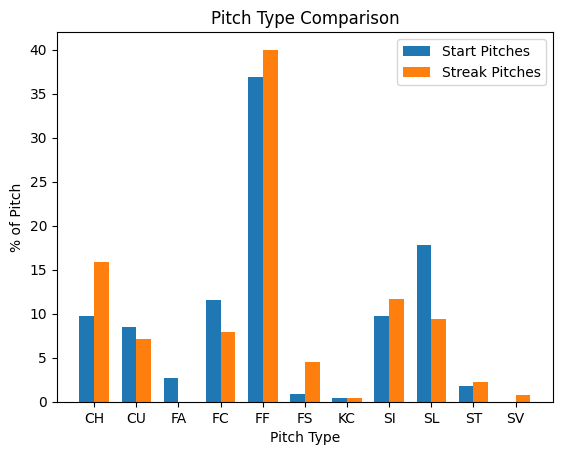

In [22]:
bar_width = .35

x = np.arange(len(start_pitches['pitch_type']))

# Create the bar graph using value x and bar_width to offset bar position. 
plt.bar(x - bar_width/2, start_pitches['%_Total'], width=bar_width, label='Start Pitches')
plt.bar(x + bar_width/2, streak_pitches['%_Total'], width=bar_width, label='Streak Pitches')

# Set the x-tick labels
plt.xticks(x, start_pitches['pitch_type'])

# Set the axis labels and title
plt.xlabel('Pitch Type')
plt.ylabel('% of Pitch')
plt.title('Pitch Type Comparison')
plt.legend()

# Display the bar graph
plt.show()

Comparing the percentage of pitches seen between start and streak dataframes, the most obvious are the increase and changeups and decrease in sliders during Yoshida's hitstreak. We'll continue on to better understand approach at the plate.

In [ ]:
## Gather and analyze data based on pitch location, pitches taken, pitches swung at, etc.
## Gather launch angle, exit velo data, etc

In [44]:
yoshi_start.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
265,CH,2023-04-18,85.6,-1.19,5.17,"Yoshida, Masataka",807799,543243,field_out,hit_into_play,NaN,NaN,NaN,NaN,11,Masataka Yoshida lines out to left fielder Kyl...,R,L,R,BOS,MIN,X,7.0,line_drive,1,1,2023,-1.15,0.38,-1.04,3.29,NaN,NaN,457759.0,0,5,Bot,56.76,115.79,NaN,NaN,543877,NaN,NaN,2.728399,-124.650229,1.055360,-12.573292,24.861496,-28.611068,3.13,1.46,268.0,93.5,18.0,86.4,1839.0,6.7,718524,543243,543877,456781,650489,669304,621043,664247,572191,596146,53.76,0.557,0.529,0.0,1.0,0.0,0.0,4.0,43,3,Changeup,1,1,1,1,1,1,1,1,Strategic,Standard,234.0,-0.043,-0.339
266,FF,2023-04-18,93.2,-1.02,5.38,"Yoshida, Masataka",807799,543243,NaN,called_strike,NaN,NaN,NaN,NaN,13,Masataka Yoshida lines out to left fielder Kyl...,R,L,R,BOS,MIN,S,NaN,NaN,1,0,2023,-0.29,1.44,-0.86,2.35,NaN,NaN,457759.0,0,5,Bot,NaN,NaN,NaN,NaN,543877,NaN,NaN,1.054677,-135.713489,-5.249181,-3.820060,29.353048,-13.388955,3.19,1.52,NaN,NaN,NaN,94.1,2270.0,6.7,718524,543243,543877,456781,650489,669304,621043,664247,572191,596146,53.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,2,4-Seam Fastball,1,1,1,1,1,1,1,1,Strategic,Standard,201.0,0.000,-0.064
267,CH,2023-04-18,86.7,-1.15,5.18,"Yoshida, Masataka",807799,543243,NaN,ball,NaN,NaN,NaN,NaN,9,Masataka Yoshida lines out to left fielder Kyl...,R,L,R,BOS,MIN,B,NaN,NaN,0,0,2023,-1.49,0.41,0.37,1.42,NaN,NaN,457759.0,0,5,Bot,NaN,NaN,NaN,NaN,543877,NaN,NaN,6.755999,-126.030362,-3.659994,-17.223091,25.289336,-27.240274,3.28,1.52,NaN,NaN,NaN,87.7,1751.0,6.9,718524,543243,543877,456781,650489,669304,621043,664247,572191,596146,53.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,1,Changeup,1,1,1,1,1,1,1,1,Strategic,Standard,238.0,0.000,0.043
268,FC,2023-04-18,87.8,-1.07,5.40,"Yoshida, Masataka",807799,543243,field_out,hit_into_play,NaN,NaN,NaN,NaN,6,Masataka Yoshida flies out to center fielder M...,R,L,R,BOS,MIN,X,8.0,fly_ball,1,1,2023,0.42,0.62,0.43,2.49,NaN,NaN,NaN,0,3,Bot,120.16,91.47,NaN,NaN,543877,NaN,NaN,2.796025,-127.860467,-2.220868,4.004756,26.737855,-25.152036,3.13,1.46,270.0,82.0,41.0,88.4,2482.0,6.6,718524,543243,543877,456781,650489,669304,621043,664247,572191,596146,53.85,0.011,0.013,0.0,1.0,0.0,0.0,3.0,25,3,Cutter,1,0,1,0,0,1,1,0,Strategic,Standard,152.0,-0.020,-0.225
269,FF,2023-04-18,92.3,-1.04,5.49,"Yoshida, Masataka",807799,543243,NaN,ball,NaN,NaN,NaN,NaN,11,Masataka Yoshida flies out to center fielder M...,R,L,R,BOS,MIN,B,NaN,NaN,0,1,2023,-0.01,1.16,-0.90,4.01,NaN,NaN,NaN,0,3,Bot,NaN,NaN,NaN,NaN,543877,NaN,NaN,0.394128,-134.503570,-0.503103,-0.235651,27.579750,-18.150590,3.25,1.49,NaN,NaN,NaN,93.2,2391.0,6.6,718524,543243,543877,456781,650489,669304,621043,664247,572191,596146,53.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,2,4-Seam Fastball,1,0,1,0,0,1,1,0,Strategic,Standard,197.0,0.000,0.027


Below is a list of all possible batting events listed in the description column for Yoshida. For this approach, we don't care the result of the play, just whether he swung or not. We'll take this data and create a new dataframe to understand tendency to swing at each individual pitch already shown above.

In [77]:
# Listing potential outcomes from description column
yoshi_events = yoshi_stats['description'].unique().tolist()
yoshi_events

['hit_into_play',
 'called_strike',
 'ball',
 'hit_by_pitch',
 'foul',
 'blocked_ball',
 'swinging_strike',
 'foul_tip',
 'swinging_strike_blocked']

In [23]:
# Create new df to include pitch type and description, with intent to group descriptions from swing vs. take
yoshi_start_swings = yoshi_start[['pitch_type', 'description']]

# Define function to read through description column and identify swing or take
def determine_swing(description):
    swing_desc = ['hit_into_play', 'foul', 'swinging_strike', 'foul_tip', 'swinging_strike_blocked']
    return 'swing' if description in swing_desc else 'take'

# Create new column result and run function against description column to append to dataframe
yoshi_start_swings['result'] = yoshi_start_swings['description'].apply(determine_swing)

yoshi_start_swings.head()

/var/folders/pw/qv8jctzd0xndgcyxsv20dtrc0000gn/T/ipykernel_2494/481857457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoshi_start_swings['result'] = yoshi_start_swings['description'].apply(determine_swing)


,pitch_type,description,result
479,CH,hit_into_play,swing
481,FC,foul,swing
482,FC,foul,swing
483,CH,foul,swing
484,CH,ball,take


We can now drop the description column as it doesn't serve a purpose for what we are attempting to do. We'll also group by pitch type and result.

In [27]:
yoshi_start_swing = yoshi_start_swings.drop(['description'], axis=1)

In [68]:
# Creating new dataframe to count # of swings per pitch
swing_count = yoshi_start_swing[yoshi_start_swing['result'] == 'swing'].groupby('pitch_type').size()
# Total count of pitches seen 
total_count = yoshi_start_swing.groupby('pitch_type').size()
# Calculating % of swings versus total number of pitches
percentage_swing = (swing_count / total_count * 100).fillna(0)
percentage_swing = percentage_swing.reset_index()
# New Dataframe for pitch type and percentage of swing per pitch
percentage_swing.columns = ['pitch_type', 'percentage_swing']
# Merging dataframes
yoshi_swing_pct = yoshi_start_swing.merge(percentage_swing, on='pitch_type', how='left')
yoshi_swing_pct1.drop_duplicates(inplace=True)
yoshi_swing_pct1 = yoshi_swing_pct1.sort_values(by='pitch_type')
yoshi_swing_pct1

,pitch_type,percentage_swing
0,CH,27.272727
1,CU,36.842105
2,FA,33.333333
3,FC,42.307692
4,FF,43.373494
5,FS,50.000000
6,KC,0.000000
7,SI,40.909091
8,SL,45.000000
9,ST,75.000000


We'll repeat the same steps above for the 14 game hitting streak and compare the results after. 

In [81]:
# Create new df to include pitch type and description, with intent to group descriptions from swing vs. take
yoshi_streak_swing = yoshi_streak[['pitch_type', 'description']]

# Create new column result and run function against description column to append to dataframe
yoshi_streak_swing['result'] = yoshi_streak_swing['description'].apply(determine_swing)

yoshi_streak_swing.head()

/var/folders/pw/qv8jctzd0xndgcyxsv20dtrc0000gn/T/ipykernel_2494/3476288688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoshi_streak_swing['result'] = yoshi_streak_swing['description'].apply(determine_swing)


,pitch_type,description,result
252,FS,hit_into_play,swing
253,FF,foul,swing
254,FS,ball,take
256,FS,ball,take
258,FF,foul,swing


In [99]:
# We have the outcome of each play (swing or take) so no need to continue with desc column
yoshi_streak_swing.drop(['description'], axis=1, inplace=True)

# Extracting # of swing per pitch type
swing_count_2 = yoshi_streak_swing[yoshi_streak_swing['result'] == 'swing'].groupby('pitch_type').size()

# Total count of pitches seen 
total_count_2 = yoshi_streak_swings.groupby('pitch_type').size()
total_count_2
#Calculating % of swings versus total number of pitches
percentage_swing_2 = (swing_count_2 / total_count_2 * 100).fillna(0)
percentage_swing_2 = percentage_swing_2.reset_index()

#New Dataframe for pitch type and percentage of swing per pitch
percentage_swing_2.columns = ['pitch_type', 'percentage_swing']

#Merging dataframes
yoshi_streak_pct = yoshi_streak_swing.merge(percentage_swing_2, on='pitch_type', how='left')
yoshi_streak_pct.drop(['result'], axis=1, inplace=True)
yoshi_streak_pct.drop_duplicates(inplace=True)
yoshi_streak_pct.sort_values(by='pitch_type', inplace=True)
display(yoshi_swing_pct1, yoshi_streak_pct)

,pitch_type,percentage_swing
0,CH,27.272727
38,CU,36.842105
134,FA,33.333333
1,FC,42.307692
6,FF,43.373494
15,FS,50.000000
50,KC,0.000000
27,SI,40.909091
30,SL,45.000000
24,ST,75.000000


,pitch_type,percentage_swing
11,CH,33.333333
25,CU,42.105263
42,FC,19.047619
1,FF,43.396226
0,FS,25.000000
107,KC,0.000000
40,SI,32.258065
13,SL,32.000000
74,ST,33.333333
176,SV,0.000000


Should have anticipated this from our earlier analysis - pitch types do not fully matchup during the different time periods. We'll do this a more straightforward way this time and create a single DF to compare the two.

In [102]:
df_swing_pct = yoshi_swing_pct1.merge(yoshi_streak_pct, on='pitch_type', how='outer', suffixes=('_start', '_streak'))
df_swing_pct.fillna(0, inplace=True)
df_swing_pct

,pitch_type,percentage_swing_start,percentage_swing_streak
0,CH,27.272727,33.333333
1,CU,36.842105,42.105263
2,FA,33.333333,0.000000
3,FC,42.307692,19.047619
4,FF,43.373494,43.396226
5,FS,50.000000,25.000000
6,KC,0.000000,0.000000
7,SI,40.909091,32.258065
8,SL,45.000000,32.000000
9,ST,75.000000,33.333333


In [106]:
#who_ls DataFrame
display(start_pitches, streak_pitches)

,pitch_type,start_count,%_Total
0,CH,22,9.777778
1,CU,19,8.444444
2,FA,6,2.666667
3,FC,26,11.555556
4,FF,83,36.888889
5,FS,2,0.888889
6,KC,1,0.444444
7,SI,22,9.777778
8,SL,40,17.777778
9,ST,4,1.777778


,pitch_type,streak_count,%_Total
0,CH,42,15.849057
1,CU,19,7.169811
2,FA,0,0.000000
3,FC,21,7.924528
4,FF,106,40.000000
5,FS,12,4.528302
6,KC,1,0.377358
7,SI,31,11.698113
8,SL,25,9.433962
9,ST,6,2.264151
